In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset.
# this dataset is taken from keggle
# https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data?resource=download

dataset = pd.read_csv('gld_price_data.csv')

In [3]:
dataset.head() # this how the dataset look like.

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
dataset.shape

(2290, 6)

In [5]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
## now we are chaecking if any missing value is present or what??
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
# finding correlataion
new = dataset.drop(['Date'],axis=1)
new.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


/var/folders/7j/jsh6v_h14h3bh9vp18pvymmc0000gn/T/ipykernel_12402/884258392.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['GLD'],color='Blue')


<Axes: xlabel='GLD', ylabel='Density'>

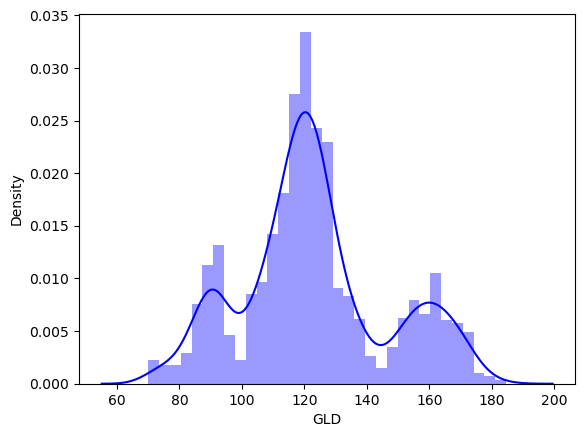

In [8]:
sns.distplot(dataset['GLD'],color='Blue')

<Axes: xlabel='SPX', ylabel='GLD'>

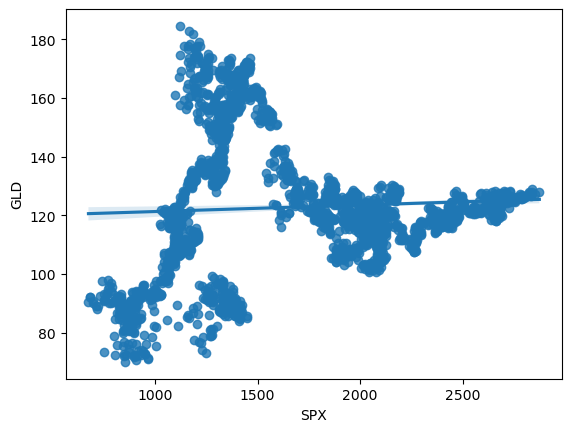

In [9]:
sns.regplot(x='SPX', y='GLD', data=dataset)

<Axes: xlabel='USO', ylabel='GLD'>

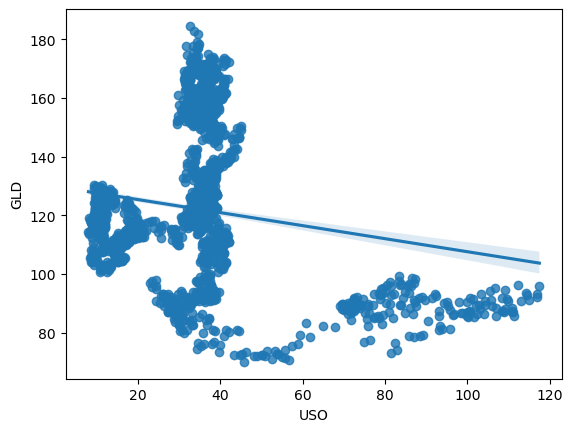

In [10]:
sns.regplot(x='USO', y='GLD', data=dataset)

<Axes: xlabel='EUR/USD', ylabel='GLD'>

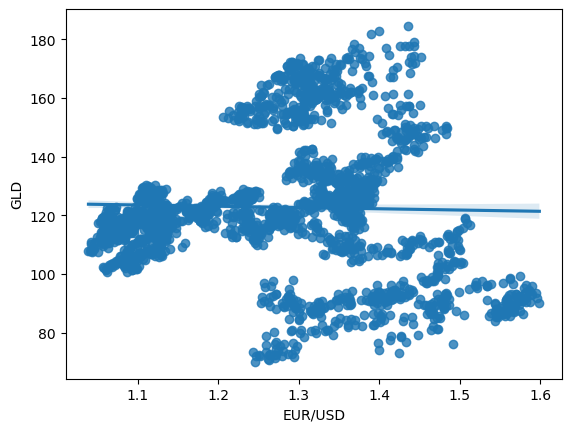

In [11]:
sns.regplot(x='EUR/USD', y='GLD', data=dataset)

In [12]:
X = dataset.drop(['Date','GLD'],axis=1)   # axis=1 when dropping a. cloumn
y = dataset['GLD']

In [13]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [18]:
y_pred = reg.predict(X_test)

In [19]:
print(y_pred)

[168.61919909  82.11649977 116.07680031 127.7168005  120.65220081
 154.78379743 150.50529839 126.1870003  117.56529869 125.97890083
 116.71620097 171.59730085 141.16089908 167.8373981  115.05059981
 117.61250078 139.38510284 170.30600058 160.01580241 157.96899936
 155.14670005 125.1839007  176.41769935 157.17440295 125.30010072
  93.83989951  78.11300001 120.75590008 119.10869946 167.38509997
  88.18670074 125.28970006  91.04050074 117.68970021 121.25519914
 136.21720037 115.67790104 115.24710068 147.47109974 107.41510099
 104.33530265  87.11239738 126.5111006  117.64850034 152.7272989
 119.60210005 108.46800017 108.13169854  93.17540067 127.09909784
  74.86680056 113.63369937 121.19170024 111.21839892 118.76939901
 120.45689927 158.56800071 167.72480133 147.03179702  85.99289856
  94.39990034  86.83279881  90.7740002  119.03220065 126.36310037
 127.51800027 169.15439983 122.39949957 117.24219859  98.40250023
 168.5005016  143.03729834 132.38410196 121.3701024  120.78199943
 119.750600

In [20]:
# now we have to compare the predicted value and the actual value.
# we are going to use r squared error.
from sklearn import metrics
error_score = metrics.r2_score(y_test,y_pred)
print("R squared error : ", error_score)

R squared error :  0.9889837747690488


In [21]:
y_test = list(y_test)

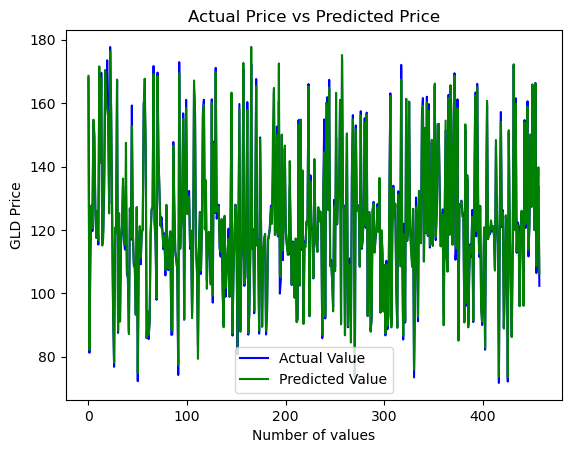

In [22]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [23]:
# now we are going to create pickle file so to use the trained model
import pickle
pickle_out = open("reg.pkl","wb")
pickle.dump(reg,pickle_out)
pickle_out.close()